In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sksurv.preprocessing import OneHotEncoder

In [7]:
data = pd.read_csv("C:/Users/thoma/Desktop/final project/turnover/turnover.csv")
data

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [9]:
data.drop(columns='industry',inplace=True)
#data.drop(columns='profession',inplace=True)


In [10]:
data['coach_'] = data.coach.apply(lambda c: 1 if c != 'no' else 0)
data[['coach_','coach']]
data.drop(columns='coach',inplace=True)

In [14]:
data["gender"] = data["gender"].astype("category")
data["profession"] = data["profession"].astype("category")
data["traffic"] = data["traffic"].astype("category")
data["coach_"] = data["coach_"].astype("category")
data["head_gender"] = data["head_gender"].astype("category")
data["greywage"] = data["greywage"].astype("category")
data["way"] = data["way"].astype("category")
#data["industry"] = data["industry"].astype("category")

array([[<AxesSubplot:title={'center':'stag'}>,
        <AxesSubplot:title={'center':'event'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'extraversion'}>,
        <AxesSubplot:title={'center':'independ'}>,
        <AxesSubplot:title={'center':'selfcontrol'}>],
       [<AxesSubplot:title={'center':'anxiety'}>,
        <AxesSubplot:title={'center':'novator'}>, <AxesSubplot:>]],
      dtype=object)

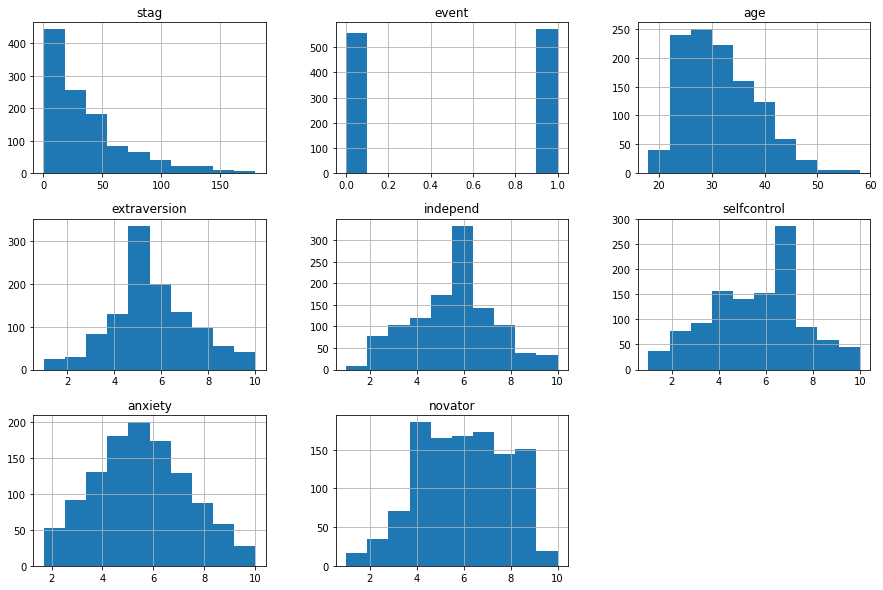

In [15]:
data.hist(figsize=(15, 10))

In [20]:

#Checking if age is a factor that affects employees from resigning
import plotly.express as px
fig = px.histogram(data, x="age", color='event', barmode='group')
fig.show()



In [19]:
fig = px.histogram(data, x="stag", color='event', barmode='group')
fig.show()

In [18]:
# Correlation of numeric variables with the turnover
data.corrwith(data.event)



stag           -0.048361
event           1.000000
age            -0.048751
extraversion    0.015458
independ        0.051864
selfcontrol    -0.040040
anxiety        -0.063232
novator         0.006825
dtype: float64

In [33]:
#making dummy 
data_dummy = OneHotEncoder().fit_transform(data)
data_dummy.head()

,stag,event,gender=m,age,profession=BusinessDevelopment,profession=Commercial,profession=Consult,profession=Engineer,profession=Finanñe,profession=HR,...,head_gender=m,greywage=white,way=car,way=foot,extraversion,independ,selfcontrol,anxiety,novator,coach_=1
0,7.030801,1,1.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,6.2,4.1,5.7,7.1,8.3,0.0
1,22.965092,1,1.0,33.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,6.2,4.1,5.7,7.1,8.3,0.0
2,15.934292,1,0.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,6.2,6.2,2.6,4.8,8.3,0.0
3,15.934292,1,0.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,5.4,7.6,4.9,2.5,6.7,0.0
4,8.410678,1,1.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.0,4.1,8.0,7.1,3.7,1.0


In [34]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(data.stag,data. event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1129 total observations, 558 right-censored observations>

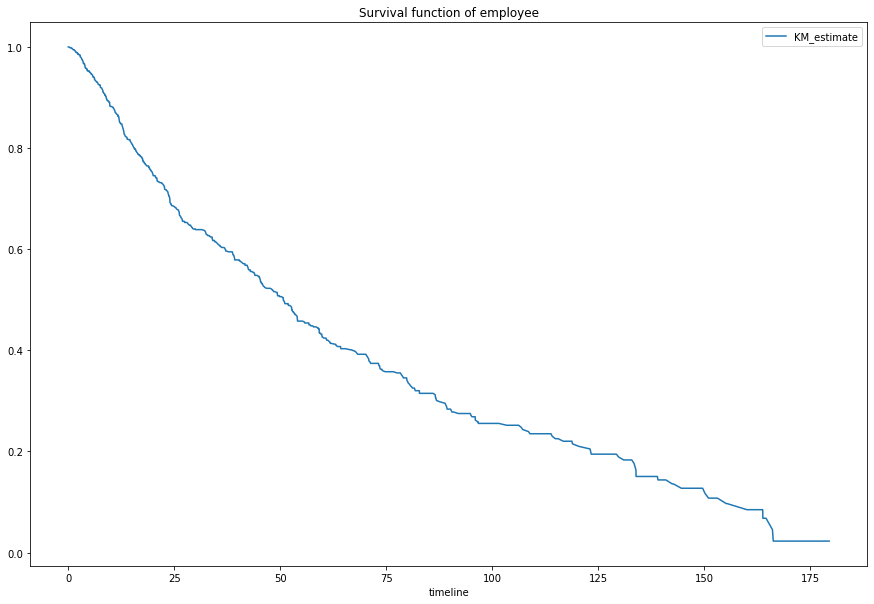

In [35]:

#simple plot of the survival function 
from matplotlib import pyplot as plt
kmf.survival_function_.plot(figsize=(15,10))
plt.title('Survival function of employee');

<AxesSubplot:xlabel='timeline'>

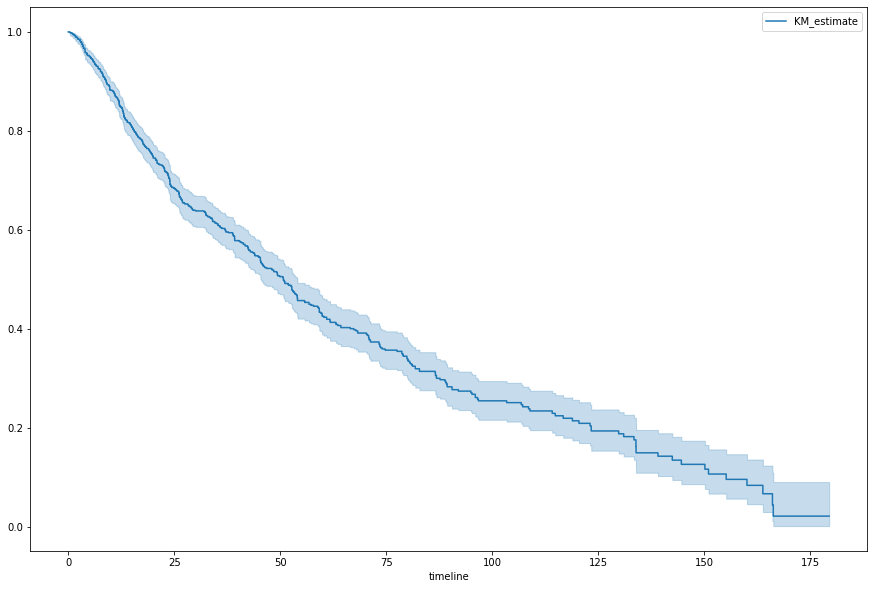

In [36]:
#survival function with i.c 95%
kmf.plot_survival_function(figsize=(15,10))

In [37]:
kmf.median_survival_time_

50.72689938

In [38]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,45.535934,54.01232


In [39]:
kmf.median_survival_time_

50.72689938

In [40]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data_dummy, duration_col='stag', event_col='event')

cph.print_summary() 


c:\Users\thoma\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3414.42
         time fit was run = 2022-09-06 18:59:38 UTC

---
                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                              
gender=m                        -0.12       0.89       0.13            -0.37             0.13                 0.69                 1.14
age                              0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
profession=BusinessDevelopment   0.55       1.74       0.50            -0.43             1.53                 0.65                 4.63
profession=Commercial            0.96       2.60       0.50            -0.02             1.93                 0.98                 6.91
profession=Consult               0.95       2.58       0.50            -0.03             1.93                 0.97                 6.90
profession=Engineer              1.17       3.22       0.53             0.13             2.21                 1.13                 9.14
profession=Finanñe               0.34       1.41       0.51            -0.66             1.34                 0.52                 3.83
profession=HR                    0.38       1.46       0.42            -0.45             1.21                 0.64                 3.34
profession=IT                    0.07       1.07       0.48            -0.86             1.01                 0.42                 2.74
profession=Law                   0.73       2.08       0.62            -0.48             1.94                 0.62                 6.99
profession=Marketing             0.96       2.62       0.47             0.03             1.89                 1.03                 6.63
profession=PR                    1.07       2.92       0.63            -0.15             2.30                 0.86                 9.95
profession=Sales                 0.51       1.67       0.46            -0.38             1.41                 0.68                 4.10
profession=Teaching              0.84       2.32       0.52            -0.18             1.86                 0.83                 6.42
profession=etc                   0.68       1.97       0.48            -0.26             1.62                 0.77                 5.03
profession=manage                1.28       3.60       0.49             0.32             2.25                 1.37                 9.44
traffic=advert                  -0.18       0.83       0.35            -0.86             0.49                 0.42                 1.64
traffic=empjs                    0.70       2.01       0.20             0.31             1.09                 1.36                 2.97
traffic=friends                  0.00       1.00       0.24            -0.46             0.47                 0.63                 1.59
traffic=rabrecNErab              0.39       1.48       0.20             0.00             0.78                 1.00                 2.18
traffic=recNErab                -0.11       0.90       0.30            -0.69             0.48                 0.50                 1.62
traffic=referal                  0.15       1.17       0.22            -0.29             0.59                 0.75                 1.81
traffic=youjs                    0.43       1.53       0.20             0.04             0.82                 1.04                 2.26
head_gender=m                    0.09       1.09       0.10            -0.11             0.28                 0.90                 1.32
greywage=white                  -0.50       0.61       0.13            -0.75            -0.24           

<AxesSubplot:>

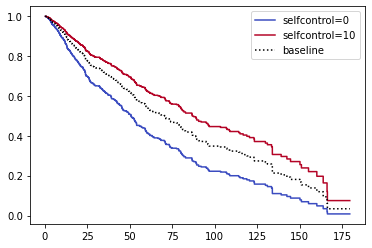

In [41]:
cph.plot_partial_effects_on_outcome(covariates='selfcontrol', values=[0,10], cmap='coolwarm')


<AxesSubplot:>

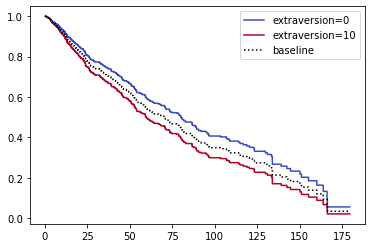

In [42]:
cph.plot_partial_effects_on_outcome(covariates='extraversion', values=[0,10], cmap='coolwarm')

<AxesSubplot:>

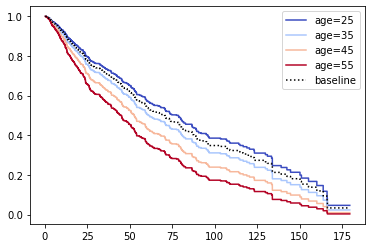

In [43]:
cph.plot_partial_effects_on_outcome(covariates='age', values=[25,35,45,55], cmap='coolwarm')

In [44]:

# filter down to just censored subjects
censored_subjects = data_dummy.loc[~data_dummy['event'].astype(bool)]
censored_subjects_last_obs = censored_subjects['stag']

In [122]:
prediction = censored_subjects.copy()
prediction['median_remaining_lifetime'] = cph.predict_median(censored_subjects, conditional_after=censored_subjects_last_obs)
prediction.sort_values(['median_remaining_lifetime','stag'])

,stag,event,gender=m,age,traffic=advert,traffic=empjs,traffic=friends,traffic=rabrecNErab,traffic=recNErab,traffic=referal,...,greywage=white,way=car,way=foot,extraversion,independ,selfcontrol,anxiety,novator,has_coach,median_remaining_lifetime
366,164.566735,0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,3.8,4.8,4.9,6.3,5.2,0,1.708419
675,163.778234,0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,5.4,7.6,5.7,7.1,6.0,0,2.266940
674,163.778234,0,1.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,4.6,6.2,8.0,7.1,5.2,0,2.365503
786,155.367557,0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,5.4,6.9,2.6,5.6,8.3,1,10.349076
1127,49.412731,0,0.0,51.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.8,7.6,5.7,6.3,5.2,0,10.480493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,39.293635,0,1.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,3.8,5.5,5.7,7.9,3.7,1,105.166324
310,27.597536,0,0.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3.8,4.1,8.7,7.9,5.2,0,105.823409
1049,25.987680,0,1.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,6.2,6.2,7.2,4.8,5.2,1,108.550308
826,12.320329,0,1.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.2,5.5,8.7,5.6,6.0,0,123.071869
